# Chapter 11 - Working with Unlabeled Data – Clustering Analysis

레이블 없는 데이터로 작업하기 (군집분석)

## 1 K-Means 를 활용한 유사도 Clustering
Grouping 알고리즘으로 '높은차원'의 군집화에 효과적

In [1]:
# Prototype-Based Clustering
# 각각의 군집이 '프로토타입'에 의해 대표성을 갖는다
# 군집의 특징을 1 Centroid(평균), 2 Medoid(빈도가 높은 값) ex)범주형의 경우에 해당 으로 선택한다
# 개별 자료들을 'Circle'로 묶기엔 좋은 알고리즘이나
# 단점은 K의 갯수를 미리 특정해야 한다
# elbow 나 silhouette plot으로 이들을 평가한다

### 01 임의의 데이터 생성
데이터 생성 및 K-means 개념정리

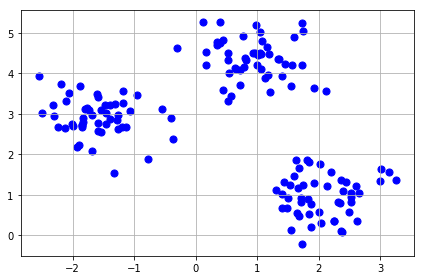

In [2]:
# 원형 군집을 이루는 Data를 생성한다
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,    # 데이터 수
                  n_features=2,     # 차원의 수
                  centers=3,        # 중심이 되는 원의 수
                  cluster_std=0.5,  # 영역의 퍼져있는 표준편차
                  shuffle=True, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid(); plt.tight_layout(); plt.show()

In [3]:
# 1 최초의 군집 중심을 샘플 관측치에서, Centroid 갯수인 k를 임의선택
# 2 각각의 샘플을 가장 가까운 Centroid에 할당한다
# 3 2단계에서 할당이 종료시, sample을 중심으로 Centroid를 옮긴다
# 4 군집할당, 평균오차, 최대반복수 등 조건에 해당시 까지 1,2,3을 반복

### 02  K-Means 분석
개체간 거리는 'Squared Euclidean distance'로 측정한다

In [4]:
# K-Means의 최적화
# '유클리드 거리'측정으로 Sum of Squared Error (제곱오차)를 최소화 하는 값을 반복해서 찾는다
# 이를 Cluster inertia (군집관성) 라고 한다

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # 군집의 수 : 3
            init='random',
            n_init=10,      # 처음 군집분석 시작 수 : 10
            max_iter=300,   # 반복횟수 : 300회 반복분류
            tol=1e-04,      # MSE의 허용오차 : 0.0001
            random_state=0)
y_km = km.fit_predict(X)
print('군집 분류내용을 정리 \ny_km :' , set(y_km))

군집 분류내용을 정리 
y_km : {0, 1, 2}


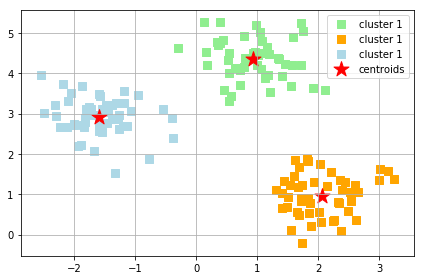

In [6]:
colormap = ['lightgreen','orange','lightblue']

for i in range(len(set(y_km))):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1],  # y_km == i 분류데이터
                s=50, c=colormap[i] , marker='s', label='cluster 1')
# Centroid
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids') 
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

### 02  K-Means ++
init='random'를 'k-means++'로 바뀌먼 주면 된다

In [7]:
# 초기값을 Random Seed로 하는경우, 때로는 결과가 나쁘고/ 느리게 수렴된다
# 대안
# 1 데이터에 K-Means를 여러번 반복 후, SSE 모델의 성능이 좋은 것을 선택한다
# 2 K-Means ++ 알고리즘으로, Centroid를 최대한 멀리 주고서 분석을 진행한다

In [8]:
# K-Means ++ 알고리즘
# 1 공집합 M을 초기화 하여 선택한 Centroid K를 저장한다
# 2 입력 샘플로부터 첫번째 Centroid를 임의로 선택 후, M에 할당한다
# 3 M 내부에 있지않은 각각의 샘플 Xi에 대해 M내부 Centroid중, 모든 Centroid의 최소제곱거리를 찾는다
# 4 다음의 Centroid를 임의로 선택시 '가중확률분포'를 사용한다
# 5 K 센트로이드가 선택될떄까지 2,3번을 반복한다
# 6 K-Mean 와 마루리는 동일하게 처리한다

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # 군집의 수 : 3
            init='k-means++',
            n_init=10,      # 처음 군집분석 시작 수 : 10
            max_iter=300,   # 반복횟수 : 300회 반복분류
            tol=1e-04,      # MSE의 허용오차 : 0.0001
            random_state=0)
y_km = km.fit_predict(X)
print('군집 분류내용을 정리 \ny_km :' , set(y_km))

군집 분류내용을 정리 
y_km : {0, 1, 2}


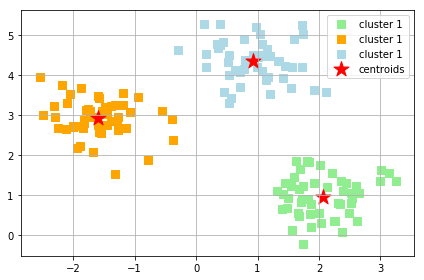

In [10]:
colormap = ['lightgreen','orange','lightblue']

for i in range(len(set(y_km))):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1],  # y_km == i 분류데이터
                s=50, c=colormap[i] , marker='s', label='cluster 1')
# Centroid
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids') 
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

In [11]:
# 평가
# K의 갯수목표가 명쾌한 경우에는 적합하지만
# 임의의 K를 정하지 못했을 때에는 문제가 발생한다

## 2 Hard / Soft Clustering
Grouping 알고리즘으로 '높은차원'의 군집화에 효과적

In [12]:
# Hard Clustring : 개별 Data, 하나의 군집에 할당
# Soft Clustring (Fuzzy Clustring) : 개별 Data, 하나 이상의 군집에 할당 (두루두루)
# Fuzzy C-Means : 개별 Data, 각 군집에 속할 확률 (0 ~ 1)로 대체

In [13]:
# FCM 알고리즘
# 1 Centroid 갯수를 설정후, 개별 점을 임의로 할당
# 2 군집 Centroid를 계산한다
# 3 각 점들의 군집을 Update 한다
# 4 소속갯수가 일정, 사용자 정의오차, 최대허용 반복횟수에 도달할떄까지 반복

## 3 Elbow method 로 최적의 K 찾기
클러스터 품질 평가를 위해, SSE(Sum of Squared Errors)를 비교한다

In [14]:
# 군집내 SSE 는 .itertia_ 로 접근이 가능하다
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


In [15]:
# SSE 에 기초하여  Elbow method를 시각화로 최적의 K를 추정가능
# K가 증가하면, 왜도는 감소할 것이다
# 따라서 왜곡이 가장 빨리 증가하는 k를 식별하면 된다.

In [16]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=1, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    y_km = km.fit_predict(X)

In [17]:
# Test 반복횟수
set(y_km)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [18]:
distortions

[713.69982894341592,
 283.46101780209307,
 72.476016709966984,
 63.700267625029035,
 55.312884222979314,
 50.593085531962345,
 43.352280365645086,
 39.071265632505202,
 32.73539592778527,
 28.247723641959265]

In [19]:
# 최대 기울기 변화값 출력
import pandas as pd
slops = ['%.3f' %float(distortions[i-1]/distortions[i])  for i in range(1,len(distortions))]
argmax = pd.Series(slops).argmax()+1+1  # count 0에서 시작 (+1) # 기울기를 앞으로 당겨서 (+1)
print('Argmax slop is :' , argmax)
slops[:argmax+3]

Argmax slop is : 3


['2.518', '3.911', '1.138', '1.152', '1.093', '1.167']

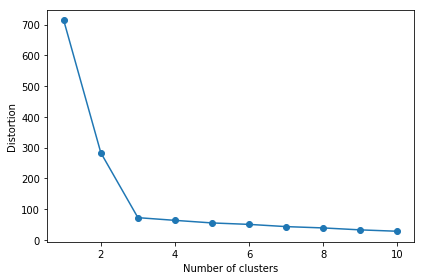

In [20]:
# Visulaization
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters'); plt.ylabel('Distortion')
plt.tight_layout(); plt.show()

In [21]:
# 결론
# 기울기가 급격하게 변하는 3을 최적의 K로 추정하면 된다

## 4 silhouette plots (실루엣 플롯)을 활용한 품질측정
K-Means 및 K-Clustring 알고리즘에서도 적용이 가능하다

silhouette_samples()

In [22]:
# # 실루엣 군집분석은 샘플들이 얼마나 결합력 있게 그루핑 되었는지 평가한다
# 1 샘플 'x와 동일한 군집'내 모든 점들간 평균거리로 --> 군집력 a를 계산
# 2 샘플 'x와 가장 가까운 군집'내 모든 샘플간의 평균거리로 --> 이웃 군집의 군집 분리력 b를 계산
# 3 a 와 b 차이중 큰 값으로 나눈 결과 --> 실루엣 점수 s를 계산

In [23]:
# s = 0 이면 a 와 b는 같은 값을 갖는다.
# a 는 자신의 군집내 샘플과 비슷한지를 측정
# b 는 다른 군집과 얼마나 다른지를 측정
# b >> a 이면 가장 이상적인 1을 갖는다

In [24]:
km = KMeans(n_clusters = 3, init = 'k-means++', 
            n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

### 01 실루엣 계수를 측정
silhouette_samples

In [25]:
# silhouette_samples() 실루엣 계수를 측정
from sklearn.metrics import silhouette_samples
import numpy as np

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') # 유클리드로 측정
y_ax_lower, y_ax_upper = 0, 0
yticks = []

In [26]:
# 실루엣 변화값을 기록
from matplotlib import cm

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

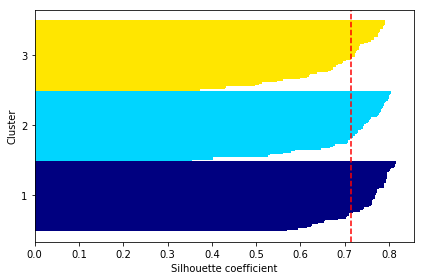

In [27]:
# 평균 실루엣 계수를 plot에 추가
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster'); plt.xlabel('Silhouette coefficient')
plt.tight_layout(); plt.show()

### 02 실루엣 계수와 K-means 와 비교측정
silhouette_samples vs K-means

In [28]:
# Clustering이 3을 최적값의 출력을 근거로
# K-Means 를 2의 연산을 통해서 차이를 비교
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

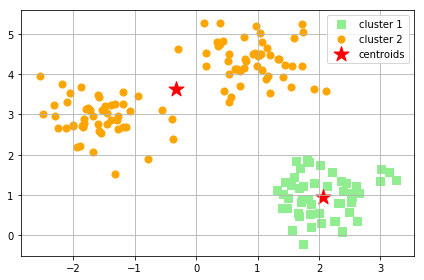

In [29]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

In [30]:
# 결과
# K-mean을 2로 연산한 결과, 오차가 커서 3이 정확하다는 증거가 된다

### 03 결과평가를 위한  실루엣 플롯 생성
silhouette_samples vs K-means

In [31]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

In [32]:
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

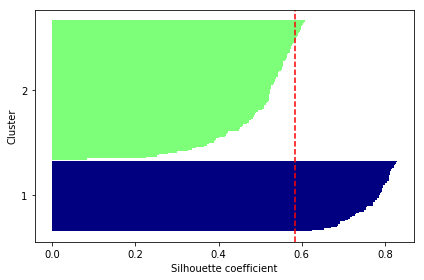

In [33]:
# 실루엣 평균점수를 시각화
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster'); plt.xlabel('Silhouette coefficient')
plt.tight_layout(); plt.show()

In [34]:
# 결과
# 실루엣 별 결과차이가 크므로, 클러스터링이 잘 된 근거가 된다.

## 5 Hierachical Tree 로 군집구성하기
계층적 알고리즘의 특징 : Dendro-Gram (계층 클러스터링 시각화)를 구현가능하다

<img src="https://www.researchgate.net/profile/Pamela_Guevara/publication/281014334/figure/fig57/AS:418517879934980@1476793847581/Figure-46-The-three-linkage-types-of-hierarchical-clustering-single-link-complete.jpg" align='left' width='700'>

In [35]:
# 응집성(흩어진 데이터를 묶음) 계층 클러스터링 표준 알고리즘 (주로 2가지가 사용)
# Single linkage(단일기준결합) : 가장 유사한 개체의 거리를 측정 뒤, 가장 거리가 짧은 군집을 합친다
# Complete linkage(완전기준결합) : 군집을 합치기 위한 가장 거리가 먼 개체들을 비교한다

In [36]:
# Complete linkage
# 1 모든 개별 data의 거리 행렬을 계산
# 2 한 개체 군집으로, 개별 관측치를 표시
# 3 가장 먼 개체들의 거리에 기반하여, 가장 가까운 두 군집을 합친다
# 4 유사도 행렬을 Update 한다
# 5 하나의 군집만 남을때까지 2~4단계를 반복한다

### 01 데이터 생성
by Numpy

In [37]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 02 거리행렬에 기반한 계층적 Clustering
linkage() 함수를 사용하여 '완전기준결합' 응집 크러스터링을 적용

SquareForm - index 별 metric 연산을 수행 (유클리드 거리를 계산)

In [38]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [39]:
# 제곱형식의 거리행렬을 사용
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])] )

/home/markbaum/Python/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [40]:
# 응집거리행렬을 사용
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)  for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [41]:
# 입력샘플행렬을 그대로 적용
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


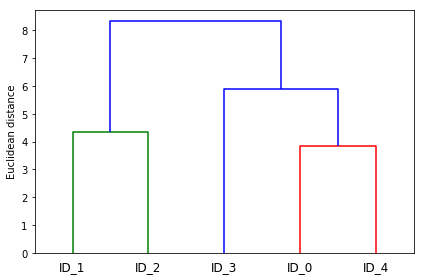

In [42]:
# 계층도로 시각화
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, 
                       labels=labels,)
plt.ylabel('Euclidean distance'); plt.tight_layout(); plt.show()

### 03 계층도를 Heat map에 첨부하기
Heat map에 계층도를 첨부한다

In [43]:
# plot 의 갯수를 정한다
# .add_axes : 계층도의 x,y축의 위치,너비,높이를 정의한다
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6]) # x-pos, y-pos, width, height

# 계층도를 (row_dendr) '반시계 방향'으로 90도 회전한다
row_dendr = dendrogram(row_clusters, orientation='left')
row_dendr

{'color_list': ['g', 'r', 'b', 'b'],
 'dcoord': [[0.0, 4.3470733871677325, 4.3470733871677325, 0.0],
  [0.0, 3.8353955541370812, 3.8353955541370812, 0.0],
  [0.0, 5.8998850390851292, 5.8998850390851292, 3.8353955541370812],
  [4.3470733871677325,
   8.3165936661140201,
   8.3165936661140201,
   5.8998850390851292]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'ivl': ['1', '2', '3', '0', '4'],
 'leaves': [1, 2, 3, 0, 4]}

In [44]:
# 계층도 개체에서 접근 가능한 데이터(df)를 재정렬 한다
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

df_rowclust

,X,Y,Z
ID_4,4.385722,0.596779,3.980443
ID_0,6.964692,2.861393,2.268515
ID_3,3.921175,3.431780,7.290497
ID_2,9.807642,6.848297,4.809319
ID_1,5.513148,7.194690,4.231065


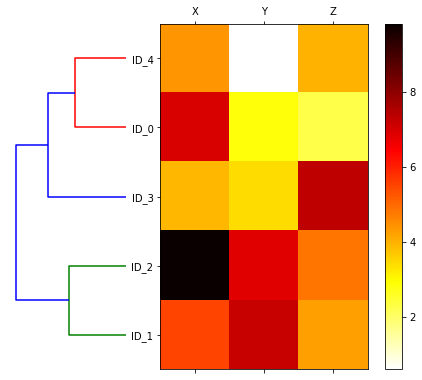

In [45]:
# 재정렬 df로부터, Heat map을 만들고 열지도를 위치시킨다
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## 6 scikit-learn 을 활용하여 클러스터링 구현
AgglomerativeClustering() 을 활용해서 구현

In [46]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,  # 군집나무를 가지치기를 위해 파라미터를 2로 설정
                             affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


In [47]:
# 결과
# 위의 계층도 결과와 동일한 값을 출력

## 7 DBSCAN을 활용하여 고밀도 영역서 찾아내기
DBSCAN에서 밀도의 개념은 특정 반지름 e 내 점들의 갯수로 정의된다
- Black Circle 을 특정
- X : 중심점 / y : 경계점 / Z : 잡음점

<img src="http://www.sthda.com/sthda/RDoc/images/dbscan-principle.png" align='left'>

In [48]:
# DBSCAN의 Parametor
# 1 MinPt : 이웃 점의 갯수
# 2 e : 데이터 내부 밀도각

In [49]:
# DBSCAN에서 특별한 레이블이 다음의 기준으로 할당된다
# 1 MinPts(이웃 점의 갯수) 설정한 반지름 e내에 떨어지면 Core Point로 간주된다
# 2 border point(경계점)는 e내에서, MinPts(이웃 점의 갯수)보다 더 작은 이웃을 갖는 점은, 중심으로부터 반지름 e안에 놓인다
# 3 중심점도 경계점도 아닌 모든 다른점은 Noise Points 이다

### 01 데이터 생성하기
make_moons

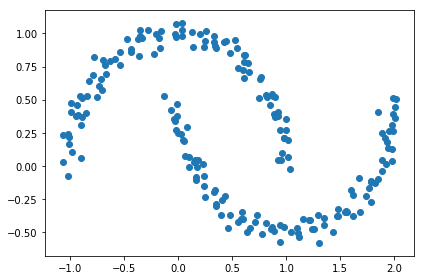

In [50]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout(); plt.show()

### 02 데이터 분류를 plot으로 비교
K-Mean/ 완전결합/ DESCAN

In [51]:
# K-Means 알고리즘 분석을 시행
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

In [52]:
# 완전결합 알고리즘 분석을 시행
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_ac = ac.fit_predict(X)

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

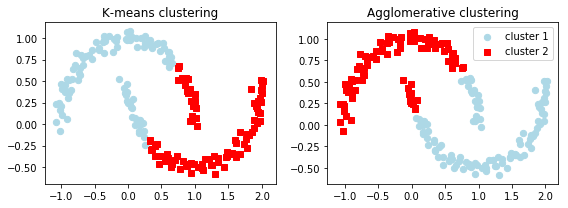

In [54]:
ax1.set_title('K-means clustering')
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')

ax2.set_title('Agglomerative clustering')
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], 
            c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], 
            c='red', marker='s', s=40, label='cluster 2')
plt.legend(); plt.tight_layout(); plt.show()

In [55]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

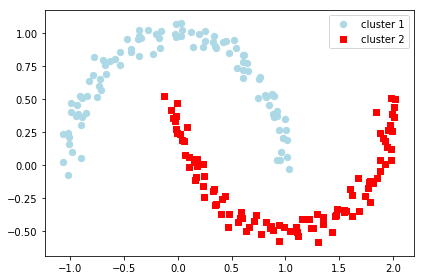

In [56]:
ax2.set_title('DBSCAN clustering')
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend(); plt.tight_layout(); plt.show()

In [57]:
# DBSCAN 알고리즘은 반달모양의 데이터도 식별이 가능하다
# 지역밀도에 기반 점을 Grouping/ 이상치를 다루고, 전역적이지 않은 모양의 식별가능

# 단점
# feature의 수가 증가하면 '차원의 저주'와 관련된 부정적인 영향이 증가한다
# 좋은 클러스터링을 위해선 MinPt, E의 좋은 조합을 실험해야 한다

In [ ]:
# 요약
# 데이터 내부의 숨겨진 구조, 정보를 발견하는 알고리즘들을 살펴봤다